In [60]:
import tensorflow as tf
import keras
from keras import datasets
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,CuDNNLSTM,Dropout
import pandas as pd

In [61]:
(xtrain,ytrain),(xtest,ytest)=datasets.mnist.load_data()

In [62]:
xtrain=xtrain.reshape(60000,28,28,1)
xtrain.shape

(60000, 28, 28, 1)

In [63]:
xtest=xtest.reshape(10000,28,28,1)

In [64]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

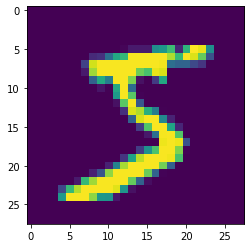

In [65]:
plt.imshow(xtrain[0])

In [68]:
model=Sequential()
#CNN
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [69]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
fit=model.fit(xtrain,ytrain,epochs=3,validation_split=0.3)

Epoch 1/3
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0850 - val_accuracy: 0.9793
Epoch 2/3
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0886 - val_accuracy: 0.9793
Epoch 3/3
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0769 - val_accuracy: 0.9814


In [75]:
model.predict(xtest)

313/313 [==============================] - 3s 8ms/step


array([[8.0528349e-17, 6.2879413e-09, 5.4406906e-09, ..., 1.0000000e+00,
        3.1894797e-13, 2.5296484e-10],
       [2.1027686e-09, 7.3270052e-09, 1.0000000e+00, ..., 2.2629239e-08,
        8.9489614e-12, 4.6756089e-13],
       [7.6249818e-10, 1.0000000e+00, 1.2613911e-09, ..., 9.0456670e-11,
        5.2606531e-08, 1.0803750e-12],
       ...,
       [3.0207305e-16, 6.4110076e-12, 2.7967045e-16, ..., 6.7801111e-08,
        1.9535575e-09, 2.5949782e-09],
       [8.3189819e-13, 1.9477877e-14, 2.0779692e-11, ..., 8.7440728e-11,
        6.6002480e-07, 3.4396672e-07],
       [5.7895544e-08, 2.5330634e-12, 4.5174384e-09, ..., 6.5618367e-16,
        9.4059773e-09, 1.5906956e-09]], dtype=float32)

<AxesSubplot:>

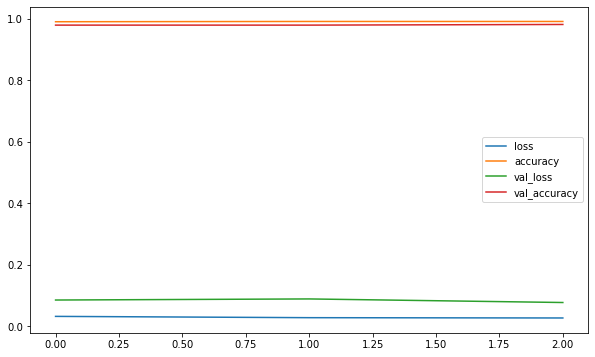

In [76]:
pd.DataFrame(fit.history).plot(figsize=(10,6))